In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

pd.set_option("expand_frame_repr", False)
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 数值不显示科学计数法，保留两位小数
np.set_printoptions(suppress=True)

In [3]:
data = pd.read_csv("./data/1_train1.csv")
data = data.fillna(0)
del data[data.columns[0]]
X = data.iloc[:, :-1]
y = data['y']

from sklearn.model_selection import train_test_split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed, stratify=y)

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = BorderlineSMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()

0    4083
1    4083
Name: y, dtype: int64

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import warnings
from plt import *

pd.set_option("expand_frame_repr", False)
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # 数值不显示科学计数法，保留两位小数
np.set_printoptions(suppress=True)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from plt import *

class KNNTuning(object):
    def __init__(self, X_train, X_test, y_train, y_test, scoring='f1_weighted', cv=10):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.scoring = scoring
        self.cv = cv

        self.gs = None

    def fit_transform(self):
        param_range = [5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
        param_grid = {
            'leaf_size': param_range
        }
        model = KNeighborsClassifier(p=1)
        gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring=self.scoring, cv=self.cv)
        gs.fit(self.X_train, self.y_train)
        print("best score: %.4f, and best params: %s" % (gs.best_score_, gs.best_params_))
        y_pred = gs.predict(self.X_test)
        print("KNN f1_score: %.4f%%" % (f1_score(self.y_test, y_pred) * 100))

        draw_confusion_matrix(self.y_test, y_pred)
        return y_pred

best score: 0.8179, and best params: {'leaf_size': 5}
KNN f1_score: 34.7188%


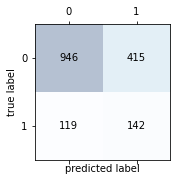

array([0, 1, 1, ..., 1, 0, 0])

In [6]:
knn = KNNTuning(X_over, X_test, y_over, y_test)
knn.fit_transform()
